In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import csv
from tabulate import tabulate
from IPython.display import Latex 
Latex('your formatted latex string here') 
import copy
import csv
from collections import defaultdict
import datetime

import os
os.chdir("/Users/keithblackwell1/Documents/GoogStudy/py3qrse")
print(os.getcwd())
from tqdm import tqdm
from importlib import reload

/Users/keithblackwell1/Documents/GoogStudy/py3qrse


In [2]:
import py3qrse as pq
import py3qrse
reload(pq)


<module 'py3qrse' from '/Users/keithblackwell1/Documents/GoogStudy/py3qrse/py3qrse/__init__.py'>

In [3]:
nasdaq = pd.read_csv('../pyqrse/nasdaq.csv', index_col=0)
nas_close = nasdaq.iloc[:, 0]
nas_p_change = nas_close.diff(44).dropna()/nas_close.iloc[:-44].values
nas_dif_log = nas_close.apply(np.log).diff(44).dropna()

In [4]:
lognas = nasdaq.iloc[:, 0].apply(np.log)
lognas = lognas[:]
lognas.shape

(3821,)

In [5]:
data = lognas.diff().dropna().values.copy()

Text(0.5, 1.0, 'Daily Adjusted NASDAQ Returns: 2003-2017')

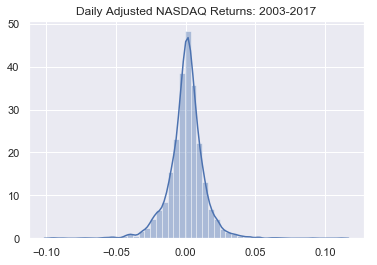

In [6]:
md = data.mean()
sd = data.std()

# data = data[(data>md-4.5*sd)&(data<md+4.5*sd)]
sns.distplot(data)
plt.title("Daily Adjusted NASDAQ Returns: 2003-2017")

In [7]:
datanorm = (data-data.mean())/data.std()
std = data.std()

In [8]:

method = 'CG'
use_jac = True
model= 'S'

qq = pq.QRSE(model, datanorm, iticks=10000)
qq.fit(method=method, use_jac=use_jac)
# qq.res
print(qq.res.fun)

# qq3= QRSE('S', datanorm, iticks=10000)
# qq3.fit(method=method, use_jac=use_jac)
# # qq.res
# print qq3.res.fun

qq2= pq.QRSE(model, data, iticks=10000)
qq2.fit(method=method, use_jac=use_jac)
# qq2.res
print(qq2.res.fun)

qq3= pq.QRSE(model, datanorm, iticks=10000)
qq3.fit(method='BFGS', use_jac=False)
# qq.res
print(qq3.res.fun)

qq4= pq.QRSE(model, data, iticks=10000)
qq4.fit(method='BFGS', use_jac=False)
# qq.res
print(qq4.res.fun)



print(qq.params[0])
print(qq.params[1])
try: 
    print(qq.params[3])
#     print qq.params[4]
except:
    pass
print() 
print(qq2.params[0]/std)
print(qq2.params[1]/std)
try: 
    
    print(qq2.params[4]*std)
except: 
    pass

print() 
print(qq3.params[0])
print(qq3.params[1])
try:  
    print(qq3.params[3])
except: 
    pass

print() 
print(qq4.params[0]/std)
print(qq4.params[1]*std)
try: 
    
    print(qq4.params[3]*std)
except: 
    pass

5023.117854462552
-11558.96310098962
5023.11785446256
-11558.963100998755
0.4249062837495627
1.133173689723942

0.4249052044724265
6679.091957490563

0.4249063208759842
1.1331736165913069

0.4249062086260359
1.133173445256564


In [13]:
%%time
qq = pq.QRSE('AL', datanorm, iticks=10000)
qq.fit(method='CG', use_jac=use_jac)
# qq.res
print(qq.res.success, qq.res.fun)


qq3= pq.QRSE('S', datanorm, iticks=10000)
qq3.fit(method='BFGS', use_jac=use_jac)

print(qq3.res.success, qq3.res.fun)

True 5013.6685164835
True 5023.11785446255
CPU times: user 251 ms, sys: 15.6 ms, total: 267 ms
Wall time: 268 ms


In [71]:
qqD = pq.QRSE('AL', data, iticks=10000)
qqD.fit(method='CG', use_jac=use_jac)

qq3D= pq.QRSE('S', data, iticks=10000)
qq3D.fit(method='CG', use_jac=use_jac)

qq00 = pq.QRSE('AB', data, iticks=10000)
qq00.fit(method='BFGS', use_jac=use_jac)

print(qqD.res.success, qqD.res.fun, qqD.bic)
print(qq3D.res.success, qq3D.res.fun, qq3D.bic)
print(qq00.res.success, qq00.res.fun, qq00.bic)

False -11568.412438110994 -23103.832853415584
False -11558.96310098962 -23093.18218487444
False -11568.853494947758 -23096.466961387512


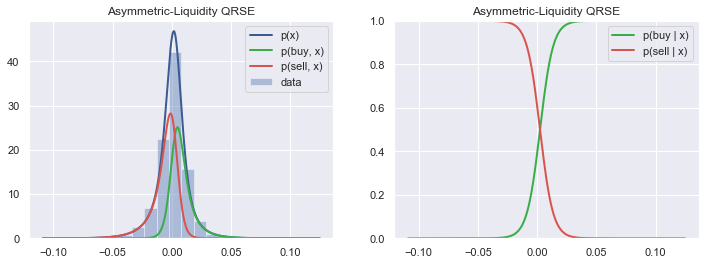

In [72]:
qqD.plotboth()

In [73]:
qq00 = QRSE('AB', datanorm, iticks=10000)
qq00.fit(method='BFGS', use_jac=use_jac)
# qq.res
print(qq00.res.success, qq00.res.fun)

True 5013.22746051394


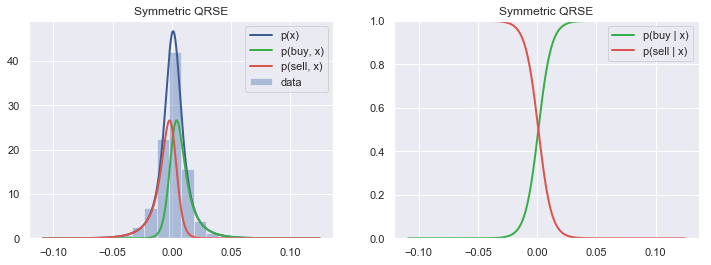

In [74]:
qq4.plotboth()

In [16]:
reload(py3qrse.kernels)

<module 'py3qrse.kernels' from '/Users/keithblackwell1/Documents/GoogStudy/py3qrse/py3qrse/kernels.py'>

In [17]:
py3qrse.kernels.update_action_labels(['sell', 'buy'])

In [18]:
py3qrse.kernels.BINARY_BASE_ACTIONS

['sell', 'buy']

In [19]:
py3qrse.kernels.QRSEKernelBase().actions

['buy', 'sell']

In [20]:
py3qrse.kernels.SQRSEKernel().actions

['buy', 'sell']

In [21]:
py3qrse.kernels.QRSEKernelBase.actions

['buy', 'sell']

In [22]:
1^1

0

In [37]:
1&1

1

In [45]:
1&0

0

In [46]:
0&1

0

In [47]:
1^1

0

In [48]:
1^0

1

In [49]:
0^1

1

In [50]:
0^0

0

In [51]:
len(bin(90))-2

7

In [54]:
np.exp(1)

2.718281828459045

In [69]:
def entropy(x):
    t=1
    p = 1/(1+np.exp(-np.abs(x/t)))
    return -p*np.log(p)-(1-p)*np.log(1-p)

In [70]:
entropy(-1000)

/Users/keithblackwell1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/keithblackwell1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


nan

In [84]:
def entropy2(x):
    t=1
    v=-x/t
    g=np.exp(v)
    return -g*v/(1+g) + np.log(1+g)

In [91]:
entropy2(30)

2.9007676693252238e-12

In [92]:
entropy(30)

2.8979995411933014e-12

In [93]:
def entropy3(x):
    t=1
    v=-x/t
    g=np.exp(v)
    p0 = 1/(1+g)
    p1 = g/(1+g)
    return -p1*np.log(p1) - p0*np.log(p0)

In [98]:
entropy3(1000)

/Users/keithblackwell1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/keithblackwell1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


nan

In [99]:
entropy2(1000)

0.0